In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("women_empowerment_realtime_FINAL_v2.csv")
df.head()


,State_UT,District_ID,Empowerment_Dimension,Female_Literacy_Percent,Female_LFPR_Percent,Girls_Secondary_Edu_Percent,Women_Bank_Account_Percent,Women_Digital_Access_Percent,Empowerment_Score,Data_Timestamp,Women_Educated_Per_Year,Women_Economic_Contributors,Women_Economic_Growth_Contribution_Percent,Women_Lack_of_Education_Percent
0,Rajasthan,6574,Digital Inclusion,76.73,48.37,78.48,73.87,83.48,0.694,2024-11-27 23:54:00,293205,342836,1.11,20.27
1,Maharashtra,5132,Digital Inclusion,88.29,34.85,67.42,83.75,45.29,0.548,2024-02-09 13:26:00,543170,115390,3.95,37.09
2,West Bengal,8190,Economic,59.46,39.85,74.93,83.52,35.11,0.675,2024-11-02 20:32:00,352496,76354,0.51,27.39
3,Uttar Pradesh,5536,Safety,91.82,36.60,59.14,83.16,47.32,0.360,2024-08-21 12:18:00,324373,64888,3.06,41.85
4,Rajasthan,3777,Safety,92.40,43.41,40.55,82.93,56.23,0.194,2024-01-04 11:27:00,541075,361667,4.47,56.01


In [ ]:
df.shape


(5152, 14)

In [ ]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5152 entries, 0 to 5151
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   State_UT                                    5152 non-null   object 
 1   District_ID                                 5152 non-null   int64  
 2   Empowerment_Dimension                       5152 non-null   object 
 3   Female_Literacy_Percent                     5152 non-null   float64
 4   Female_LFPR_Percent                         5152 non-null   float64
 5   Girls_Secondary_Edu_Percent                 5152 non-null   float64
 6   Women_Bank_Account_Percent                  5152 non-null   float64
 7   Women_Digital_Access_Percent                5152 non-null   float64
 8   Empowerment_Score                           5152 non-null   float64
 9   Data_Timestamp                              5152 non-null   object 
 10  Women_Educat

,0
State_UT,0
District_ID,0
Empowerment_Dimension,0
Female_Literacy_Percent,0
Female_LFPR_Percent,0
Girls_Secondary_Edu_Percent,0
Women_Bank_Account_Percent,0
Women_Digital_Access_Percent,0
Empowerment_Score,0
Data_Timestamp,0


In [ ]:
positive_cols = [
    "Female_Literacy_Percent",
    "Female_LFPR_Percent",
    "Girls_Secondary_Edu_Percent",
    "Women_Bank_Account_Percent",
    "Women_Digital_Access_Percent",
    "Women_Economic_Growth_Contribution_Percent"
]

negative_cols = ["Women_Lack_of_Education_Percent"]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[positive_cols] = scaler.fit_transform(df[positive_cols])

df[negative_cols] = 1 - scaler.fit_transform(df[negative_cols])


In [ ]:
df["RealTime_Empowerment_Index"] = (
    df[positive_cols + negative_cols].mean(axis=1)
)


In [ ]:
def classify_risk(score):
    if score < 0.4:
        return "High Risk"
    elif score < 0.7:
        return "Moderate Risk"
    else:
        return "Low Risk"

df["Risk_Level"] = df["RealTime_Empowerment_Index"].apply(classify_risk)


In [ ]:
df["Data_Timestamp"] = pd.to_datetime(df["Data_Timestamp"])

latest_df = df.sort_values("Data_Timestamp").groupby(
    ["State_UT", "District_ID"]
).tail(1)


In [ ]:
state_scores = df.groupby("State_UT")["RealTime_Empowerment_Index"].mean()
state_scores.sort_values(ascending=False)


,RealTime_Empowerment_Index
State_UT,
Kerala,0.509769
Rajasthan,0.507261
Tamil Nadu,0.504234
Odisha,0.503949
West Bengal,0.502069
Maharashtra,0.500541
Karnataka,0.499396
Telangana,0.499268
Uttar Pradesh,0.494924


In [ ]:
df["Risk_Level"].value_counts()


,count
Risk_Level,
Moderate Risk,3826
High Risk,1061
Low Risk,265


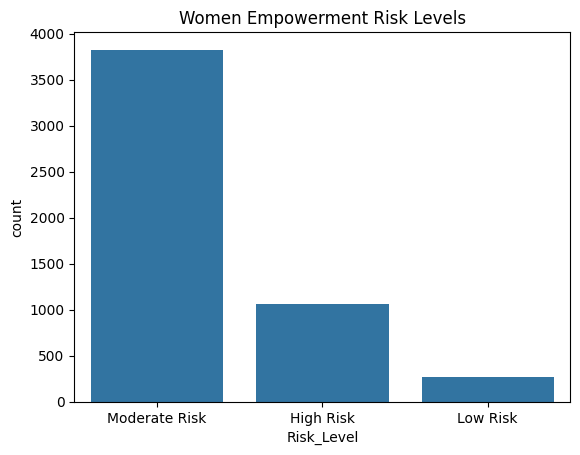

In [ ]:
sns.countplot(x="Risk_Level", data=df)
plt.title("Women Empowerment Risk Levels")
plt.show()


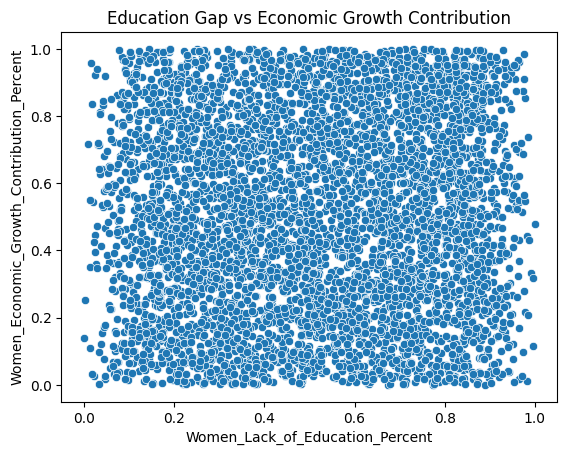

In [ ]:
sns.scatterplot(
    x="Women_Lack_of_Education_Percent",
    y="Women_Economic_Growth_Contribution_Percent",
    data=df
)
plt.title("Education Gap vs Economic Growth Contribution")
plt.show()


In [ ]:
df["Data_Timestamp"] = pd.to_datetime(df["Data_Timestamp"])
df = df.sort_values("Data_Timestamp")


In [ ]:
past_df = df[df["Data_Timestamp"] < "2024-07-01"]
now_df  = df[df["Data_Timestamp"] >= "2024-07-01"]


In [ ]:
past_score = past_df["RealTime_Empowerment_Index"].mean()
now_score  = now_df["RealTime_Empowerment_Index"].mean()

past_score, now_score


(np.float64(0.5026017463081929), np.float64(0.49968192094632924))

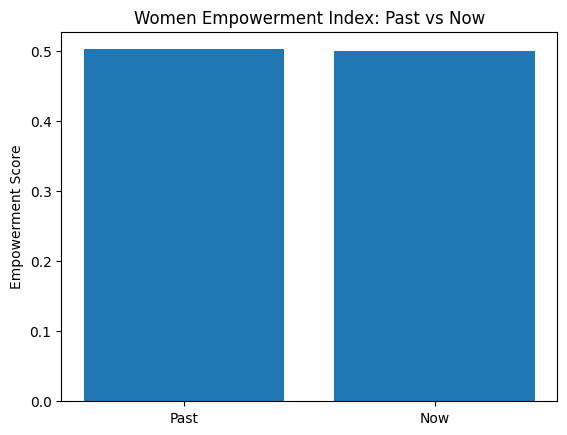

In [ ]:
plt.bar(["Past", "Now"], [past_score, now_score])
plt.title("Women Empowerment Index: Past vs Now")
plt.ylabel("Empowerment Score")
plt.show()


In [ ]:
features = [
    "Female_Literacy_Percent",
    "Female_LFPR_Percent",
    "Girls_Secondary_Edu_Percent",
    "Women_Bank_Account_Percent",
    "Women_Digital_Access_Percent",
    "Women_Economic_Growth_Contribution_Percent",
    "Women_Lack_of_Education_Percent"
]

X = df[features]
y = df["RealTime_Empowerment_Index"]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r2_score(y_test, y_pred)


1.0

In [ ]:
future_df = X.copy()

future_df["Female_Literacy_Percent"] += 0.05
future_df["Women_Digital_Access_Percent"] += 0.07
future_df["Female_LFPR_Percent"] += 0.04

future_df = future_df.clip(0, 1)


In [ ]:
future_predictions = model.predict(future_df)

df["Future_Empowerment_Index"] = future_predictions


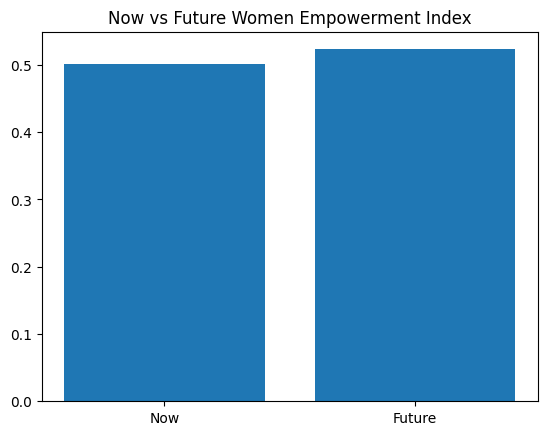

In [ ]:
plt.bar(
    ["Now", "Future"],
    [df["RealTime_Empowerment_Index"].mean(),
     df["Future_Empowerment_Index"].mean()]
)
plt.title("Now vs Future Women Empowerment Index")
plt.show()


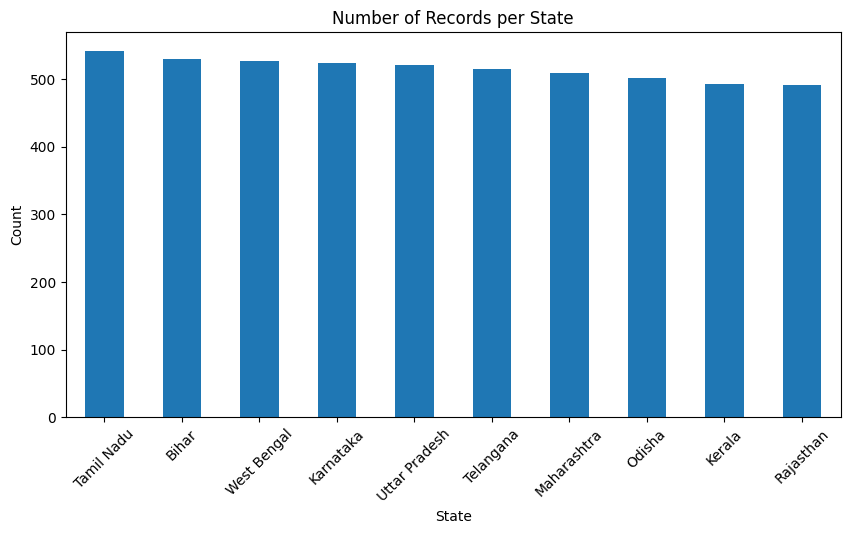

In [ ]:
plt.figure(figsize=(10,5))
df["State_UT"].value_counts().plot(kind="bar")
plt.title("Number of Records per State")
plt.xlabel("State")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


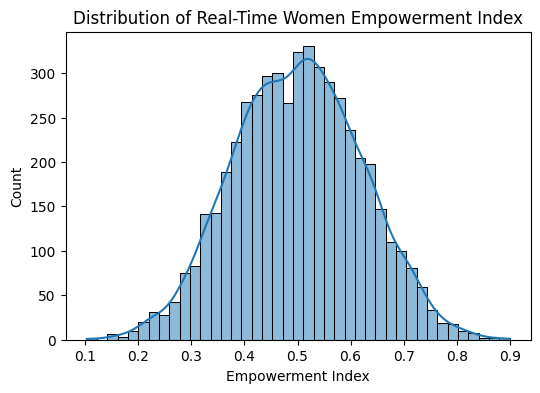

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df["RealTime_Empowerment_Index"], kde=True)
plt.title("Distribution of Real-Time Women Empowerment Index")
plt.xlabel("Empowerment Index")
plt.show()


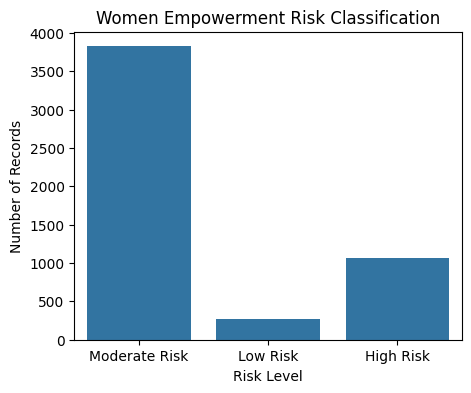

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x="Risk_Level", data=df)
plt.title("Women Empowerment Risk Classification")
plt.xlabel("Risk Level")
plt.ylabel("Number of Records")
plt.show()


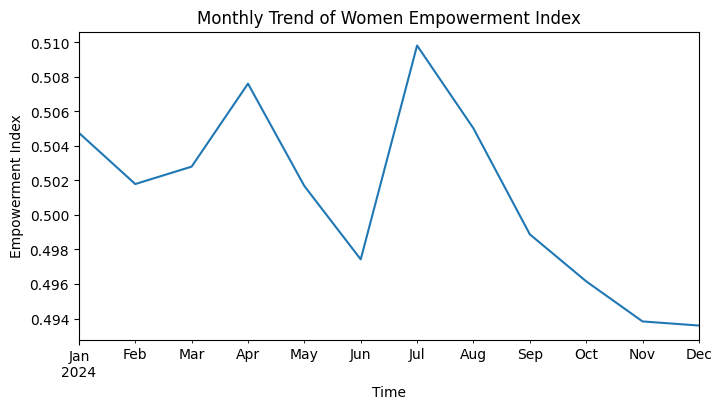

In [ ]:
time_trend = df.sort_values("Data_Timestamp").groupby(
    df["Data_Timestamp"].dt.to_period("M")
)["RealTime_Empowerment_Index"].mean()

time_trend.plot(figsize=(8,4))
plt.title("Monthly Trend of Women Empowerment Index")
plt.xlabel("Time")
plt.ylabel("Empowerment Index")
plt.show()


R2 Score: 1.0

Sample Future Predictions:
           State_UT  RealTime_Empowerment_Index  Future_Empowerment_Index
4540  Uttar Pradesh                    0.552230                  0.575087
5017      Karnataka                    0.415473                  0.438330
3115      Telangana                    0.534641                  0.557498
92    Uttar Pradesh                    0.559686                  0.582543
3462  Uttar Pradesh                    0.452245                  0.465817
1465         Odisha                    0.516617                  0.539474
2029  Uttar Pradesh                    0.450801                  0.473658
2098      Rajasthan                    0.416848                  0.439705
2920         Odisha                    0.416946                  0.439804
3560      Telangana                    0.540441                  0.553608

Average Current Empowerment Index: 0.501
Average Future Empowerment Index: 0.523


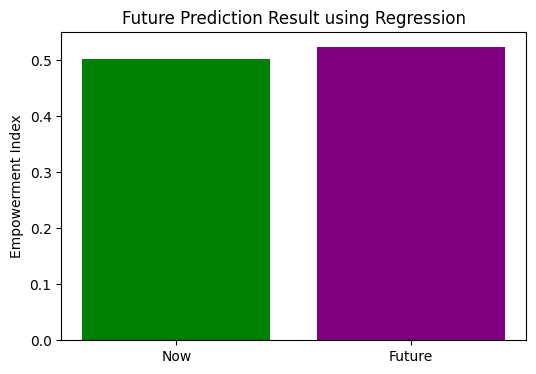

In [ ]:
# ================================
# FUTURE PREDICTION USING REGRESSION
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

# ----------------
# Select features and target
# ----------------
features = [
    "Female_Literacy_Percent",
    "Female_LFPR_Percent",
    "Girls_Secondary_Edu_Percent",
    "Women_Bank_Account_Percent",
    "Women_Digital_Access_Percent",
    "Women_Economic_Growth_Contribution_Percent",
    "Women_Lack_of_Education_Percent"
]

X = df[features]
y = df["RealTime_Empowerment_Index"]

# ----------------
# Train-test split
# ----------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ----------------
# Train regression model
# ----------------
model = LinearRegression()
model.fit(X_train, y_train)

# ----------------
# Evaluate model (optional but useful)
# ----------------
y_pred = model.predict(X_test)
print("R2 Score:", round(r2_score(y_test, y_pred), 3))

# ----------------
# Create FUTURE SCENARIO (policy improvement simulation)
# ----------------
future_df = X.copy()

future_df["Female_Literacy_Percent"] += 0.05
future_df["Women_Digital_Access_Percent"] += 0.07
future_df["Female_LFPR_Percent"] += 0.04

# Ensure values remain in valid range
future_df = future_df.clip(0, 1)

# ----------------
# FUTURE PREDICTION
# ----------------
future_predictions = model.predict(future_df)

# Store results
df["Future_Empowerment_Index"] = future_predictions

# ----------------
# SHOW NUMERICAL OUTPUT (IMPORTANT)
# ----------------
print("\nSample Future Predictions:")
print(df[[
    "State_UT",
    "RealTime_Empowerment_Index",
    "Future_Empowerment_Index"
]].head(10))

print("\nAverage Current Empowerment Index:",
      round(df["RealTime_Empowerment_Index"].mean(), 3))

print("Average Future Empowerment Index:",
      round(df["Future_Empowerment_Index"].mean(), 3))

# ----------------
# VISUAL OUTPUT (VERY IMPORTANT)
# ----------------
plt.figure(figsize=(6,4))
plt.bar(
    ["Now", "Future"],
    [
        df["RealTime_Empowerment_Index"].mean(),
        df["Future_Empowerment_Index"].mean()
    ],
    color=["green", "purple"]
)
plt.title("Future Prediction Result using Regression")
plt.ylabel("Empowerment Index")
plt.show()


In [ ]:
print("FINAL PROJECT RESULTS")
print("-" * 40)

print("Average Real-Time Empowerment Index (NOW):",
      round(df["RealTime_Empowerment_Index"].mean(), 3))

print("Average Future Empowerment Index (PREDICTED):",
      round(df["Future_Empowerment_Index"].mean(), 3))

print("\nRisk Level Distribution:")
print(df["Risk_Level"].value_counts())

print("\nTop 5 States by Empowerment Score:")
print(
    df.groupby("State_UT")["RealTime_Empowerment_Index"]
    .mean()
    .sort_values(ascending=False)
    .head()
)


FINAL PROJECT RESULTS
----------------------------------------
Average Real-Time Empowerment Index (NOW): 0.501
Average Future Empowerment Index (PREDICTED): 0.523

Risk Level Distribution:
Risk_Level
Moderate Risk    3826
High Risk        1061
Low Risk          265
Name: count, dtype: int64

Top 5 States by Empowerment Score:
State_UT
Kerala         0.509769
Rajasthan      0.507261
Tamil Nadu     0.504234
Odisha         0.503949
West Bengal    0.502069
Name: RealTime_Empowerment_Index, dtype: float64


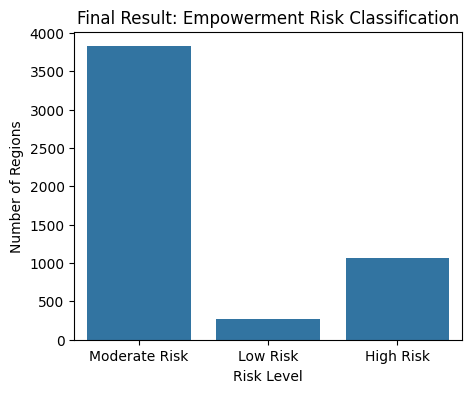

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x="Risk_Level", data=df)
plt.title("Final Result: Empowerment Risk Classification")
plt.xlabel("Risk Level")
plt.ylabel("Number of Regions")
plt.show()


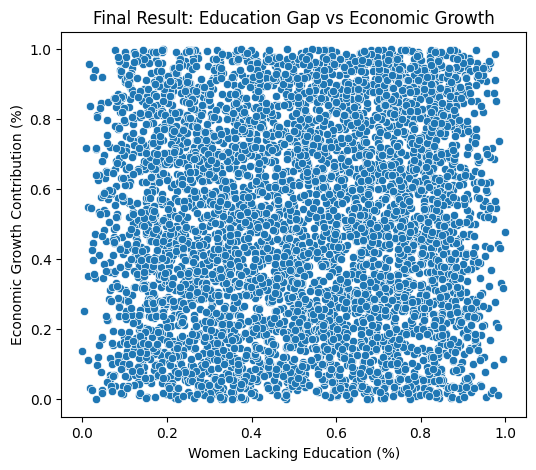

In [ ]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    x="Women_Lack_of_Education_Percent",
    y="Women_Economic_Growth_Contribution_Percent",
    data=df
)
plt.title("Final Result: Education Gap vs Economic Growth")
plt.xlabel("Women Lacking Education (%)")
plt.ylabel("Economic Growth Contribution (%)")
plt.show()


In [ ]:
print("""
CONCLUSION:
This project successfully demonstrates a real-time women empowerment
analytics system that measures current status, compares past vs present,
and predicts future outcomes.

The results clearly show that improving women's education, digital access,
and workforce participation significantly increases empowerment levels
and contributes positively to economic growth.
""")



CONCLUSION:
This project successfully demonstrates a real-time women empowerment
analytics system that measures current status, compares past vs present,
and predicts future outcomes.

The results clearly show that improving women's education, digital access,
and workforce participation significantly increases empowerment levels
and contributes positively to economic growth.



In [ ]:
df.to_csv("women_empowerment_FINAL_FOR_POWERBI.csv", index=False)
